In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78549738/least-square-inaccurate-in-chemical-speciation

In [2]:
K = np.power(10., np.array([2.81, 2.27, 1.77, 1.27, 0.81, 0.15]))
Ka = np.power(10., -9.25)

In [3]:
def system(x, K, Ka, xt, Lt):
    # (X, XL, XL2, XL3, XL4, XL5, XL6, L, LH, H)
    n = len(K)
    return np.array([
        # Complexation equilibria:
        x[i + 1] - K[i] * x[i] * x[n + 1]
        for i in range(len(K))
    ] + [
        # Mass balance (Nickel):
        np.sum(x[:n + 1]) - xt,
        # Mass balance (Ammonium):
        np.sum(np.arange(n + 1) * x[:n + 1]) + x[n + 1] + x[n + 2] - Lt,
        # Acid/Base equilibrium:
        Ka * x[n + 2] - x[n + 1] * x[n + 3],
        # Charge Balance:
        2 * np.sum(x[:n + 1]) + x[n + 2] + x[n + 3] - 2 * xt
    ])

In [4]:
Ls = np.linspace(0, 12, 200)
xt = 1.

In [5]:
sols = []
for Lt in Ls:
    sol = optimize.fsolve(system, x0=[Lt * 1.1] * (len(K) + 4), args=(K, Ka, xt, Lt))
    sols.append(sol)

In [6]:
C = np.array(sols)

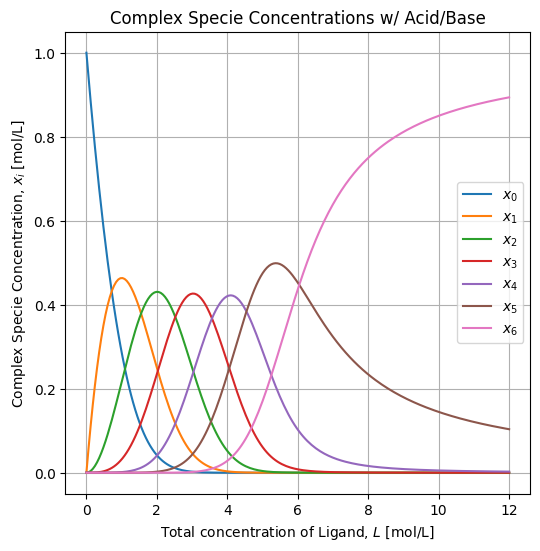

In [7]:
fig, axe = plt.subplots(figsize=(6,6))
axe.plot(Ls, C[:,:len(K) + 1])
#axe.plot(Ls, C[:,-2:])
axe.set_title("Complex Specie Concentrations w/ Acid/Base")
axe.set_xlabel("Total concentration of Ligand, $L$ [mol/L]")
axe.set_ylabel("Complex Specie Concentration, $x_i$ [mol/L]")
axe.legend(["$x_{%d}$" % i for i in range(len(K) + 1)])
axe.grid()